In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from random import random 
from scipy import linalg as LA

In [9]:
#Create 50 independet MLPs with 1 hidden layer of 10 neurons and 1 output neuron
def MLP_1(x,n,MLP_no):
    '''Compute Output for MLP with 1 hidden layer of 10 neurons and 1 output neuron'''
    #initialize weights
    #seed the random number generator
    np.random.seed(MLP_no+100)
    w21 = np.random.normal(0, 1, (10, 1))
    w10 = np.random.normal(0, n, (10, 1))
    w20 = np.random.uniform(-2, 2, (10, 1))
    
    #Compute input for first hidden layer
    h = w10@x - w20
    #Compute activation for hidden layer
    f_h = np.tanh(h)
    #Compute output
    output = w21.T@f_h
    
    return output

In [10]:

x = np.linspace(-2,2,100).reshape(100,1)

#Add 50 columns for outputs
input_output1 = np.append(x, np.zeros((100,50)), axis=1)
input_output2 = np.append(x, np.zeros((100,50)), axis=1)

for MLP_no in np.arange(start = 1, stop = 51):
    for i in range(len(x)):
        output1 = MLP_1(x[i].reshape(1,1),2, MLP_no)
        output2 = MLP_1(x[i].reshape(1,1),0.5, MLP_no)
        input_output1[i,MLP_no] = output1
        input_output2[i,MLP_no] = output2


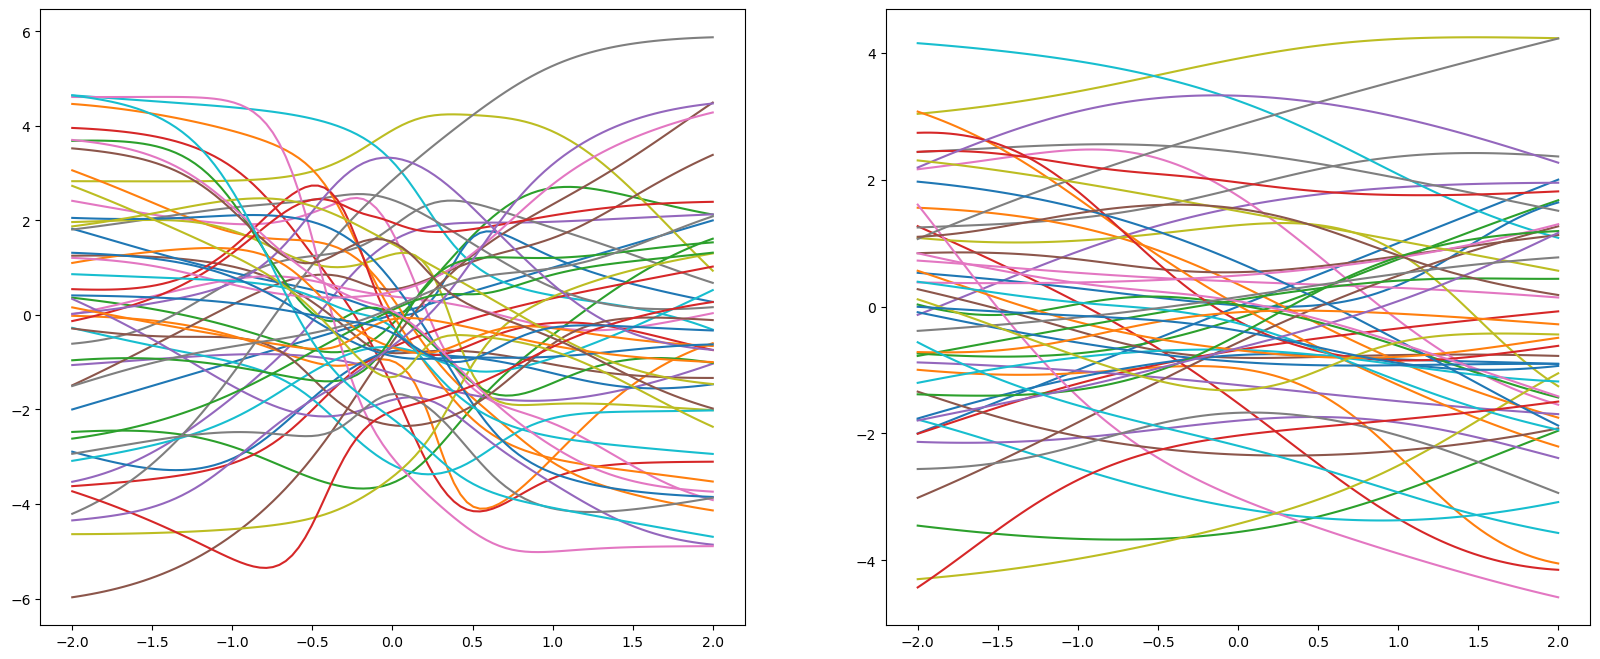

In [11]:
number_of_MLPs = np.shape(input_output1)[1]

fig = plt.figure(figsize=(20,8))

#Plot output of all 50 MLPs with initialization 1
ax1 = fig.add_subplot(1,2,1)
for i in np.arange(number_of_MLPs):
    plt.plot(input_output1[:,0], input_output1[:,i])
    
#Plot output of all 50 MLPs with initialization 2
ax2 = fig.add_subplot(1,2,2)
number_of_MLPs = np.shape(input_output2)[1]

for i in np.arange(number_of_MLPs):
    plt.plot(input_output2[:,0], input_output2[:,i])
    
plt.show()

*Compute the mean squared error (MSE) between each of these 2 × 50 (50 from each of the above two initialization procedures) input-output functions and the function g(x) = −x. For each of the two initialization procedures, which MLP approximates g best? Plot y(x) vs. x for these two MLPs
*

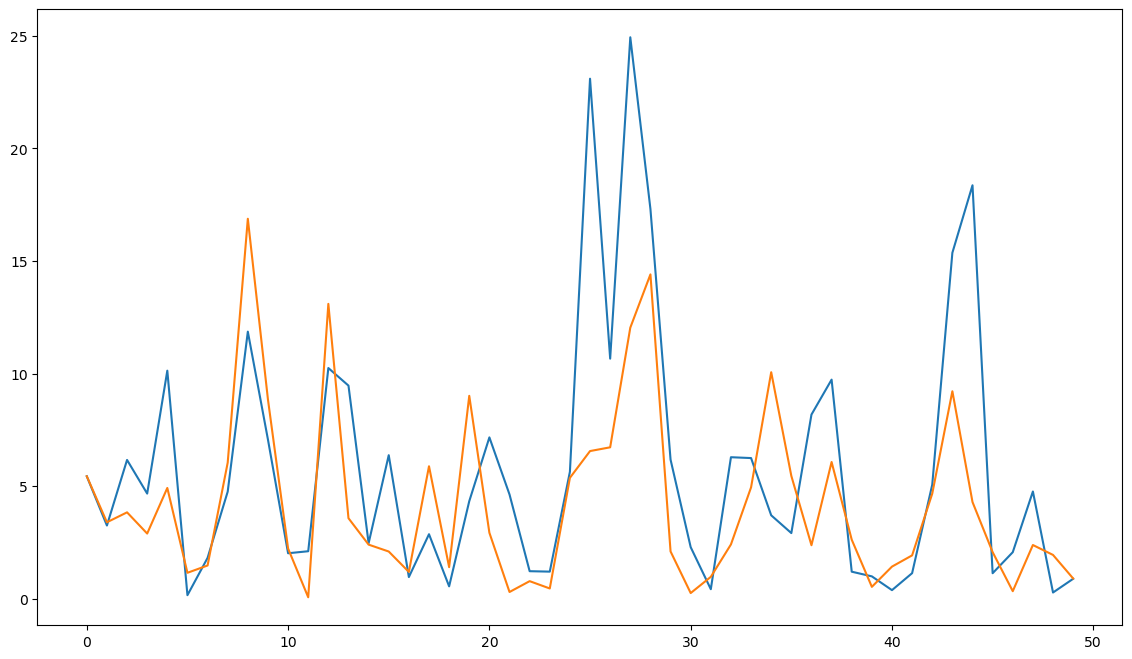

In [12]:
from sklearn.metrics import mean_squared_error

number_of_MLPs = np.shape(input_output1)[1]-1

g_function = x*-1
mse_1 = np.zeros([50,1])
mse_2 = np.zeros([50,1])

fig = plt.figure(figsize=(14,8))

for i in np.arange(number_of_MLPs)-1:
    mse_1[i] = mean_squared_error(g_function, input_output1[:,i])
    mse_2[i] = mean_squared_error(g_function, input_output2[:,i])

plt.plot((np.arange(number_of_MLPs)), mse_1)
plt.plot((np.arange(number_of_MLPs)), mse_2)

plt.show()


In [14]:
#save activations and derivatives
#implement backpropagation
#implement gradient descent
#implement train 
#train our networt with our data
#make some predictions 

class MLP(object):
    def __init__(self, inputs=10, hidden = [3], outputs=1):
        '''Constructor to build a multilayer perceptron. Takes the number of inputs,
           the number of neurons in each hidden layer, and the number of outputs.
           
            Example: MLP(2, [3, 3], 1) creates a MLP with 2 inputs, 2 hidden layers
            
            Args:
                inputs(int): number of inputs
                hidden(list): list of number of neurons in each hidden layer
                outputs(int): number of outputs
           '''
        
        #initialize weights
        self.inputs = inputs
        self.hidden = hidden
        self.outputs = outputs
        
        layers = [self.inputs] + self.hidden + [self.outputs]
        
        #Anpassung der Eingabe
        self.inputs = np.insert(self.inputs, 0, 1, axis=0)
        layers[0:-1] = [layers[i]+1 for i in range(len(layers)-1)]
        
        #seed the random number generator
        self.weights = []
        
        for j in range(len(layers)-1):
            if j==0:
                w=np.random.uniform(-0.5,0.5,(layers[j+1]-1,layers[j]))
            else:
                w=np.random.uniform(-0.5,0.5,(layers[j+1],layers[j]))
            self.weights.append(w)
            
        #Anzahl der Neuronen ohne Bias für die Aktivationen
        layers[0:-1] = [layers[i]-1 for i in range(len(layers)-1)]
        
        activations = []
        for i in range(len(layers)): 
            a = np.zeros((layers[i],)) #Number of zeros is equal to number of neurons in layer
            activations.append(a)
        self.activations = activations
        
        derivatives = []
        for i in range(len(layers)-1): # Because the weights are between layers
            d = np.zeros((layers[i], layers[i+1])) #rows are number of neurons in current layer, columns are number of neurons in next layer
            derivatives.append(d)
        self.derivatives = derivatives
        
    def forward_propagate(self, inputs, layers):
        """Computes forward propagation of the network based on input signals.
        
        Args:
            inputs (ndarray): Input signals
        
        Returns:
            activations (ndarray): Output values"""
            
         #Anzahl der Neuronen mit Bias für die Multiplikationen
        layers[0:-1] = [layers[i]+1 for i in range(len(layers)-1)]
        
        input_i=input
        
        #Activationen für die einzelnen Schichten
        for i in range(len(layers)-2):
            h_i = np.dot(self.weights[i],input_i)
            activation_i = self._tanh(h_i)
            self.activations[i]=activation_i
            input_i = np.insert(activation_i, 0, 1, axis=0)
            
        #last layer
        h_i = np.dot(self.weights[-1],input_i)
        activation_i = self._identity(h_i)
        self.activations[-1]=activation_i
        
        return self.activations
        
        
    
    def back_propagate(self, error, verbose=False):
        """Backpropogates an error signal.
        Args:
            error (ndarray): The error to backprop.
        Returns:
            error (ndarray): The final error of the input
        """
        
        #dE/dW_i = (y - a_[i+1]) * s'(h_[i+1])) * a_i
        # s'(h_[i+1]) = s(h_[i+1]) * (1 - s(h_[i+1]))
        # s(h_[i+1]) = a_[i+1]
        
        #dE/dW_i = (y - a_[i+1]) * s'(h_[i+1]))* w_i * s'(h_[i]) * a_[i-1]
        #error = (y - a_[i+1]) * s'(h_[i+1])

        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):

            # get activation for previous layer
            activations = self.activations[i+1]

            # apply sigmoid derivative function
            delta = error * self._tanh_derivative(activations) #ndarray([0.1,0.2]) ---> ndarray([[0.1, 0.2]])

            # reshape delta as to have it as a 2d array
            delta_reshaped = delta.reshape(delta.shape[0], -1).T

            # get activations for current layer
            current_activations = self.activations[i] # ndarray([0.1,0.2]) ---> ndarray([[0.1],[0.2]])

            # reshape activations as to have them as a 2d column matrix
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0],-1)

            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations_reshaped.T, delta_reshaped)

            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)
            
            if verbose:
                print('Derivative for W{}:\n {}\n'.format(i, self.derivatives[i]))
        
        return error
    
    def gradient_descent(self, learningRate=1):
        """Updates the weights of the network based on the gradient descent
        procedure, taking into account the given learning rate."""
        
        for i in range(len(self.weights)):
            weights = self.weights[i]
            print("Original W{}:\n {}\n".format(i, weights))
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate
            print("Updated W{}:\n {}\n".format(i, weights))
    
    def train(self, inputs, targets, epochs, learning_rate):
        """Trains model running forward prop and backprop
        Args:
            inputs (ndarray): X
            targets (ndarray): Y
            epochs (int): Num. epochs we want to train the network for
            learning_rate (float): Step to apply to gradient descent
        """
        # now enter the training loop
        for i in range(epochs):
            sum_errors = 0

            # iterate through all the training data
            for j, input in enumerate(inputs):
                target = targets[j]

                # activate the network!
                output = self.forward_propagate(input)

                #calculate error
                error = 0.5 * (targets - output)**2

                self.back_propagate(error)

                # now perform gradient descent on the derivatives
                # (this will update the weights
                self.gradient_descent(learning_rate)

                # keep track of the MSE for reporting later
                sum_errors += self._mse(target, output)

            # Epoch complete, report the training error
            print("Error: {} at epoch {}".format(sum_errors / len(inputs), i+1))

        print("Training complete!")
        print("=====")

        
    def _tanh(self, x):
        return np.tanh(x)
    
    def _tanh_derivative(self, x):
        return 1.0 - np.tanh(x)**2
    
    def _mse(self, target, output):
        """Mean Squared Error loss function
        Args:
            target (ndarray): The ground trut
            output (ndarray): The predicted values
        Returns:
            (float): Output
        """
        return np.average((target - output) ** 2)

    def _identity(self, x):
        return x

    def _identity_derivative(self,x):
        return 1

        

if __name__ == '__main__':
    
    mlp = MLP(10, [3], 1)
    
    #create inputs
    
    data = np.genfromtxt('RegressionData.csv', delimiter=' ')
    inputs = data[:,0]
    targets = data[:,1]

   

AxisError: axis 0 is out of bounds for array of dimension 0

In [27]:
#Functions

def _tanh(x):
        return np.tanh(x)
    
def _tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def _mse(target, output):
    """Mean Squared Error loss function
    Args:
        target (ndarray): The ground trut
        output (ndarray): The predicted values
    Returns:
        (float): Output
    """
    return np.average((target - output) ** 2)

def _identity(x):
    return x

def _identity_derivative(x):
    return 1

def front_propagate(input,layers,weights):
    #Anzahl der Neuronen ohne Bias für die Aktivationen
    layers[0:-1] = [layers[i]-1 for i in range(len(layers)-1)]
    
    #Activationmatrix
    activations = []
    
    for i in layers[1:]:
        a=np.zeros((i,1))
        activations.append(a)
    
    #Anzahl der Neuronen mit Bias für die Multiplikationen
    layers[0:-1] = [layers[i]+1 for i in range(len(layers)-1)]
    
    input_i=input
    
    #Activationen für die einzelnen Schichten
    for i in range(len(layers)-2):
        h_i = np.dot(weights[i],input_i)
        activation_i = _tanh(h_i)
        activations[i]=activation_i
        input_i = np.insert(activation_i, 0, 1, axis=0)
        
    #last layer
    h_i = np.dot(weights[-1],input_i)
    activation_i = _identity(h_i)
    activations[-1]=activation_i
    
    
    return activations
    

            
#antes de pasar los weights debes pasar el bias con 1.
#añadir el bias a la primera capa


#multiplicar la primera capa por los weights
#aplicar la funcion de activacion
#multiplicar la segunda capa por los weights
#aplicar la funcion de activacion   
#multiplicar la tercera capa por los weights

[ 0.0075903   0.2641505  -0.15175605]
[-0.1682597   0.34758749 -0.24946778]
[ 0.0144906   0.26081457 -0.14788208]
[-0.02010739  0.27747639 -0.16725775]
[ 0.25582868  0.13779193 -0.00705198]
[-0.13732371  0.33304669 -0.23233307]
[ 0.1570512   0.1899558  -0.06626119]
[ 0.03900931  0.24890343 -0.13407195]
[ 0.07964408  0.22893973 -0.11100491]
[ 0.1756899   0.18034489 -0.05529383]
[ 0.00634264  0.26292833 -0.15334904]
[-0.16954895  0.34634591 -0.25110089]
[ 0.01324621  0.25959367 -0.14947274]
[-0.02136695  0.27624954 -0.16885951]
[ 0.25476855  0.13664108 -0.0085235 ]
[-0.13861166  0.33180675 -0.23396182]
[ 0.15589984  0.18876987 -0.06779067]
[ 0.03777748  0.24768732 -0.13565387]
[ 0.07843627  0.22773267 -0.11257074]
[ 0.17455415  0.17916486 -0.0568134 ]
[ 0.0049939   0.26160044 -0.15507328]
[-0.17093982  0.34499771 -0.25286562]
[ 0.01190089  0.25826711 -0.15119457]
[-0.02272812  0.27491669 -0.17059278]
[ 0.25361886  0.13538927 -0.01012048]
[-0.14000161  0.3304602  -0.23572236]
[ 0.15465289

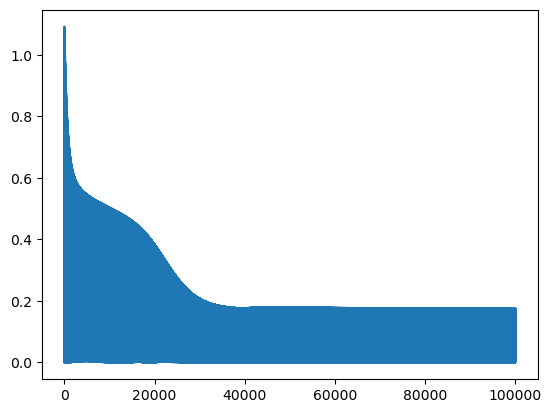

In [17]:
#fetch data from dataset
from numpy import genfromtxt
data = genfromtxt('RegressionData.csv', delimiter=' ')

np.random.seed(10)
#(A) Initialization:
#Initial weights from input node to hidden layer incl. bias (shape: 3,2)
w01_bias = np.random.uniform(-0.5, 0.5, (3, 2))
#Initial weights from hidden layer to output neuron incl. bias
w12_bias = np.random.uniform(-0.5, 0.5, (1,4))


#(B) Iterative learning:
#Innitialize
nu = 0.01
gradient01 = np.zeros([3,2])
gradient12 = np.zeros([1,4])

error_log = np.zeros(1)
for epoch in np.arange(10000):
    
    for i in np.arange(data.shape[0]):
        #(a) Forward Propagation:
        x = data[i, 0].reshape(1,1)
        y = data[i, 1]
        #prepend bias term (shape: 2,1)
        x_bias = np.insert(x, 0, 1)
        #Calculate input of hidden layer (shape: 3,1)
        hidden_input = w01_bias @ x_bias
        #Calculate output of hidden layer
        hidden_output = np.tanh(hidden_input)
        #Prepend bias term
        hidden_output_bias = np.insert(hidden_output,0,1)
        #Calculate input=output of output neuron
        outputneuron = w12_bias @ hidden_output_bias

        error = 0.5*np.square(y-outputneuron)

        #Backward pass
        delta_output = 1
        probe1 = hidden_output_bias[1::]
        # print(probe1)
        delta_hidden = np.dot((1 - np.tanh(probe1)), np.sum(w12_bias[0][1:4]))

        gradient01 += nu * ((y - outputneuron)*delta_hidden).reshape(3,1) @ np.tanh(x_bias).reshape(1,2)
        gradient12 += nu * ((y - outputneuron)*delta_output*hidden_output_bias).reshape(1,4)

        error_log = np.append(error_log, error)

    #Update weights
    gradient01 = gradient01/10
    gradient12 = gradient12/10

    w01_bias = w01_bias + gradient01
    w12_bias = w12_bias + gradient12
plt.plot(error_log)

In [ ]:
def back_propagate(error,activations,layers):
    """Backpropogates an error signal.
        Args:
            error (ndarray): The error to backprop.
        Returns:
            error (ndarray): The final error of the input
    """
    
    
    #dE/dW_i = (y - a_[i+1]) * s'(h_[i+1])) * a_i
    # s'(h_[i+1]) = s(h_[i+1]) * (1 - s(h_[i+1]))
    # s(h_[i+1]) = a_[i+1]
        
    #dE/dW_i = (y - a_[i+1]) * s'(h_[i+1]))* w_i * s'(h_[i]) * a_[i-1]
    #error = (y - a_[i+1]) * s'(h_[i+1])
        
    # iterate backwards through the network layers
    for i in reversed(range(len(self.derivatives))):
        # get activation for previous layer
        activations = self.activations[i+1]
        # apply sigmoid derivative function
        delta = error * self._tanh_derivative(activations) #ndarray([0.1,0.2]) ---> ndarray([[0.1, 0.2]])
        # reshape delta as to have it as a 2d array
        delta_reshaped = delta.reshape(delta.shape[0], -1).T
        # get activations for current layer
        current_activations = self.activations[i] # ndarray([0.1,0.2]) ---> ndarray([[0.1],[0.2]])
        # reshape activations as to have them as a 2d column matrix
        current_activations_reshaped = current_activations.reshape(current_activations.shape[0],-1)
        # save derivative after applying matrix multiplication
        self.derivatives[i] = np.dot(current_activations_reshaped.T, delta_reshaped)
        # backpropogate the next error
        error = np.dot(delta, self.weights[i].T)
        
        if verbose:
            print('Derivative for W{}:\n {}\n'.format(i, self.derivatives[i]))
    
        return error
    
    
        
    

In [29]:
def train_front(input, yT, layers, nu=0.01, epochs=10000):
    
    #Anpassung der Eingabe
    input = np.insert(input, 0, 1, axis=0)
    
    #Anpassung der Gewichte mit Bias (Dimensionen)
    layers[0:-1] = [layers[i]+1 for i in range(len(layers)-1)]
    
    weights = []
    for j in range(len(layers)-1):
        if j==0:
            w=np.random.uniform(-0.5,0.5,(layers[j+1]-1,layers[j]))
        else:
            w=np.random.uniform(-0.5,0.5,(layers[j+1],layers[j]))
        weights.append(w)
    #Front propagation
    activity = front_propagate(input, layers, weights)
        
    return activity
    
    # #Anzahl der Neuronen ohne Bias für die Aktivationen
    # layers[0:-1] = [layers[i]-1 for i in range(len(layers)-1)]
    
    
    # #Forward propagation to get activations for all layers
    # output = front_propagate(input, layers, bias=True)
    # #cuadratic error 
    # error = 0.5*np.square(yT-output[-1])
    
    # #Backward pass
    # delta_output = 1
    # probe1 = output[-2][1::]
    # delta_hidden = np.dot((1 - np.tanh(probe1)), np.sum(w12_bias[0][1:4]))
    
    # #Gradient calculation
    # gradient01 += nu * ((yT - output[-1])*delta_hidden).reshape(3,1) @ np.tanh(input).reshape(1,2)
    # gradient12 += nu * ((yT - output[-1])*delta_output*output[-2]).reshape(1,4)
    
    
data = np.genfromtxt('RegressionData.csv', delimiter=' ')
input = data[:,0].reshape(-1,1)
yT = data[:,1].reshape(-1,1)
layers = [input.shape[0]]+[3]+[1]
activations = train_front(input, yT, layers, nu=0.01, epochs=10000)
activations
    

[array([[-0.26414371],
        [ 0.46322778],
        [-0.32586135]]),
 array([[0.01997455]])]